# INFO 213: Data Science Programming 2
___

### Week 3: KNN and Linear Algebra
___

### 9:30-10:50am, Mon. July 9, 2018 and Wed. July 11, 2018
---

**Question:**
-  How to use the scikit learn KNN library?

**Objectives:**
- Load example data sets from the Scikit Learn library
- Analyze correlations between features of the data
- Pre-process and scale the data is necessary
- Build KNN model using the Scikit Learn library
- Evaluate classification results

## Introduction


The package `sklearn.neighbors` provides functionality for unsupervised and supervised neighbors-based learning methods. Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits or satellite image scenes. Being a non-parametric and instance-based method, it is often successful in classification situations where the decision boundary is very irregular.

scikit-learn implements two different nearest neighbors classifiers: KNeighborsClassifier implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user. RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius r of each training point, where r is a floating-point value specified by the user.

The k-neighbors classification in KNeighborsClassifier is the more commonly used of the two techniques. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied which is used to compute the weights.

## The Iris Flower Data Set
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

### Load the data

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

%matplotlib inline```

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

%matplotlib inline

```
df = pd.read_csv("Iris.csv")```

In [3]:
df = pd.read_csv("Iris.csv")

```
df.sample(5)```

In [4]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
0,1,5.1,3.5,1.4,0.2,Iris-setosa
96,97,5.7,2.9,4.2,1.3,Iris-versicolor


```
df.shape```

In [5]:
df.shape

(150, 6)

```
species = df.Species.unique()```

In [6]:
species = df.Species.unique()

```
label_maps = dict(zip(species, np.arange(len(species))))
label_maps```

In [7]:
label_maps = dict(zip(species, np.arange(len(species))))
label_maps

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

```
df['Species'].replace(label_maps, inplace = True)```

In [8]:
df['Species'].replace(label_maps, inplace = True)

```
df.head()```

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


```
X_train = df.iloc[:, 1:-1]```

In [10]:
X_train = df.iloc[:, 1:-1]

```
X_train.head()```

In [11]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Explore the Data

```
y_train = df.Species```

In [12]:
y_train = df.Species

```
plt.figure(figsize = (15, 9))
pd.plotting.scatter_matrix(X_train, figsize = (15, 9), c = y_train, marker = 'o')
plt.grid()```

<Figure size 1080x648 with 0 Axes>

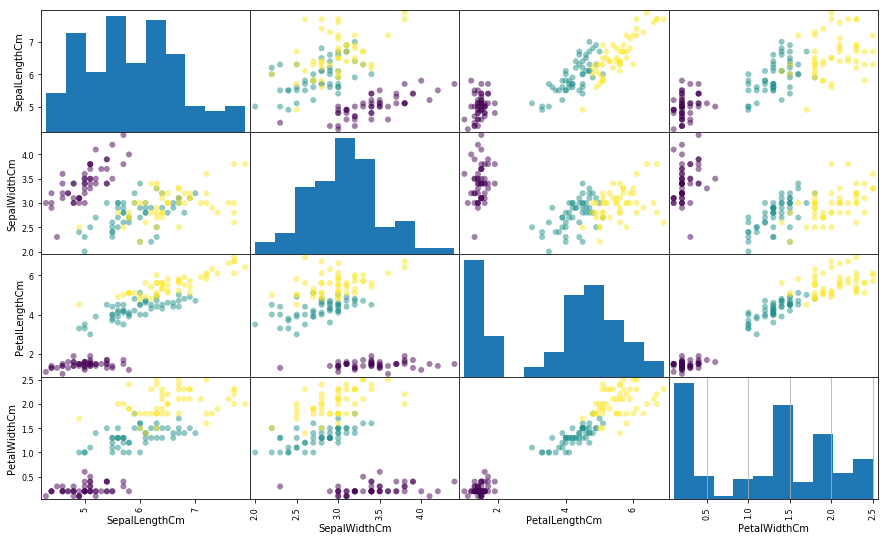

In [13]:
plt.figure(figsize = (15, 9))
pd.plotting.scatter_matrix(X_train, figsize = (15, 9), c = y_train, marker = 'o')
plt.grid()

### Model and Predict

```
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)```

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9733333333333334

```
y_pred = knn.predict(X_train)```

In [15]:
y_pred = knn.predict(X_train)

```
plt.figure(figsize = (15, 9))
pd.plotting.scatter_matrix(X_train, figsize = (15, 9), c = y_pred, marker = 'o')
plt.grid()```

<Figure size 1080x648 with 0 Axes>

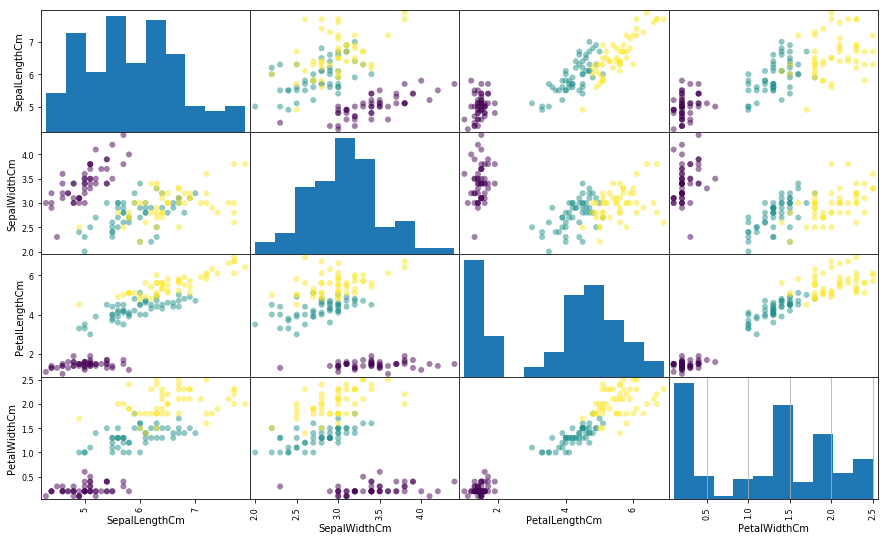

In [16]:
plt.figure(figsize = (15, 9))
pd.plotting.scatter_matrix(X_train, figsize = (15, 9), c = y_pred, marker = 'o')
plt.grid()

### Evaluate
Given a set of labeled data and a predictive model, every data point lies in one of
four categories:
• True positive (tp): “This message is iris-setosa, and we predicted s iris-setosa.”
• False positive (fp) (Type 1 Error): “This message is not iris-setosa (v or c), but we predicted as irish-setosa.”
• False negative (fn) (Type 2 Error): “This message is iris-setosa, but we predicted it is not iris-setosa.”
• True negative (tn): “This message is not irish-setosa, and we correctly predicted not it is not iris-setosa.”

We often represent these as counts in a confusion matrix:

|      |positive | negative |
|------|------|------|
|positive|tp |fp|
|negative|fn | tn|

$accuracy = \frac{tp + tn}{tp + fp+tn+fn}$

$precision = \frac{tp}{tp+fp}$

$recall = \frac{tp}{tp+fn}$

$F1\_Score = \frac{2}{\frac{1}{recall} + \frac{1}{precision}} = \frac{2tp}{2tp + fp + fn}$

```
tp = sum((y_train == 0) & (y_pred == 0))

fn = sum((y_train == 0) & (y_pred != 0))

fp= sum((y_train  != 0) & (y_pred == 0))

tn = sum((y_train != 0) & (y_pred != 0))

print("recall for class 0 = " + str(tp / (tp + fn)))
print("precision for class 0 = " + str(tp / (tp + fp)))
print("F1 Score for class 0 = " + str(2 * tp /(2 * tp + fp + fn))) ```

In [17]:
tp = sum((y_train == 0) & (y_pred == 0))

fn = sum((y_train == 0) & (y_pred != 0))

fp= sum((y_train  != 0) & (y_pred == 0))

tn = sum((y_train != 0) & (y_pred != 0))

print("recall for class 0 = " + str(tp / (tp + fn)))
print("precision for class 0 = " + str(tp / (tp + fp)))
print("F1 Score for class 0 = " + str(2 * tp /(2 * tp + fp + fn)))


recall for class 0 = 1.0
precision for class 0 = 1.0
F1 Score for class 0 = 1.0


```
tp = sum((y_train == 1) & (y_pred == 1))

fn = sum((y_train == 1) & (y_pred != 1))

fp = sum((y_train  != 1) & (y_pred == 1))

tn = sum((y_train !=1) & (y_pred != 1))

print("recall for class 1 = " + str(tp / (tp + fn)))
print("precision for class 1 = " + str(tp / (tp + fp)))
print("F1 Score for class 1 = " + str(2 * tp /(2 * tp + fp + fn)))```

In [18]:
tp = sum((y_train == 1) & (y_pred == 1))

fn = sum((y_train == 1) & (y_pred != 1))

fp = sum((y_train  != 1) & (y_pred == 1))

tn = sum((y_train !=1) & (y_pred != 1))

print("recall for class 1 = " + str(tp / (tp + fn)))
print("precision for class 1 = " + str(tp / (tp + fp)))
print("F1 Score for class 1 = " + str(2 * tp /(2 * tp + fp + fn)))

recall for class 1 = 1.0
precision for class 1 = 1.0
F1 Score for class 1 = 1.0


```
tp = sum((y_train == 2) & (y_pred == 2))

fn = sum((y_train == 2) & (y_pred != 2))

fp= sum((y_train  != 2) & (y_pred == 2))

tn = sum((y_train !=2) & (y_pred != 2))

print("recall for class 2 = " + str(tp / (tp + fn)))
print("precision for class 2 = " + str(tp / (tp + fp)))
print("F1 Score for class 2 = " + str(2 * tp /(2*tp + fp + fn)))```

In [19]:
tp = sum((y_train == 2) & (y_pred == 2))

fn = sum((y_train == 2) & (y_pred != 2))

fp= sum((y_train  != 2) & (y_pred == 2))

tn = sum((y_train !=2) & (y_pred != 2))

print("recall for class 2 = " + str(tp / (tp + fn)))
print("precision for class 2 = " + str(tp / (tp + fp)))
print("F1 Score for class 2 = " + str(2 * tp /(2*tp + fp + fn)))

recall for class 2 = 1.0
precision for class 2 = 1.0
F1 Score for class 2 = 1.0


## Rescaling
Many techniques are sensitive to the scale of your data. For example, imagine that you
have a data set consisting of the heights and weights of hundreds of data scientists,
and that you are trying to identify clusters of body sizes.

Intuitively, we’d like clusters to represent points near each other, which means that we
need some notion of distance between points. We already have a Euclidean distance
function, so a natural approach might be to treat (height, weight) pairs as points in
two-dimensional space. Consider the people listed following table:

```
df = pd.DataFrame({"Person":['A', 'B', 'C'], "height (cm)":[160, 170.2, 177.8], "weight (pounds)":[150, 160, 171], "height (inches)":[63, 67, 70]})
df```

In [20]:
df = pd.DataFrame({"Person":['A', 'B', 'C'], "height (cm)":[160, 170.2, 177.8], "weight (pounds)":[150, 160, 171], "height (inches)":[63, 67, 70]})
df

,Person,height (cm),weight (pounds),height (inches)
0,A,160.0,150,63
1,B,170.2,160,67
2,C,177.8,171,70


The distances between the pairs of persons in terms of height (inches) and weight (pounds) are:

```
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[1, 2:])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[2, 2:])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 2:], df.iloc[2, 2:])))```

In [21]:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[1, 2:])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[2, 2:])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 2:], df.iloc[2, 2:])))

A to B: 10.770329614269007
A to C: 22.135943621178654
B to C: 11.40175425099138


The distnace between the pairs of persons in terms of height (cm) and weight (pounts) are:

```
print("A to B: " + str(distance.euclidean(df.iloc[0, 1::2], df.iloc[1, 1::2])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 1::2], df.iloc[2, 1::2])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 1::2], df.iloc[2, 1::2])))```

In [22]:
print("A to B: " + str(distance.euclidean(df.iloc[0, 1::2], df.iloc[1, 1::2])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 1::2], df.iloc[2, 1::2])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 1::2], df.iloc[2, 1::2])))

A to B: 10.95627673984186
A to C: 19.126944345608383
B to C: 8.17067928632622


In [23]:
df.iloc[1, 1::2]

height (cm)        170.2
height (inches)       67
Name: 1, dtype: object

The nearest point to B is different using different units. Obviously it’s problematic if changing units can change results like this. For this reason,
when dimensions aren’t comparable with one another, we will sometimes rescale
our data so that each dimension has mean 0 and standard deviation 1. This effectively
gets rid of the units, converting each dimension to “standard deviations from the
mean.

The equation for scaling is $scaled = (data - mean) / standard\_deviation$

```
df_data = df.set_index('Person')
df_scaled = (df_data - df_data.mean(axis = 0)) / df_data.std(axis = 0)
df_scaled```

In [24]:
df_data = df.set_index('Person')
df_scaled = (df_data - df_data.mean(axis = 0)) / df_data.std(axis = 0)
df_scaled

,height (cm),weight (pounds),height (inches)
Person,,,
A,-1.044980,-0.983755,-1.044074
B,0.097034,-0.031734,0.094916
C,0.947946,1.015489,0.949158


```
df_scaled.mean(axis = 0)```

In [25]:
df_scaled.mean(axis = 0)

height (cm)       -9.992007e-16
weight (pounds)   -8.881784e-16
height (inches)   -1.369275e-15
dtype: float64

```
df_scaled.std(axis = 0)```

In [26]:
df_scaled.std(axis = 0)

height (cm)        1.0
weight (pounds)    1.0
height (inches)    1.0
dtype: float64

```
# the distances using height in inches:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[1, 1:])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[2, 1:])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 1:], df_scaled.iloc[2, 1:])))```

In [27]:
# the distances using height in inches:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[1, 1:])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[2, 1:])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 1:], df_scaled.iloc[2, 1:])))

A to B: 1.4844668093876099
A to C: 2.823110310444266
B to C: 1.3514460651057634


```
# the distances using height in cm:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 0::2], df_scaled.iloc[1, 0::2])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 0::2], df_scaled.iloc[2, 0::2])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 0::2], df_scaled.iloc[2, 0::2])))```

In [28]:
# the distances using height in cm:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 0::2], df_scaled.iloc[1, 0::2])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 0::2], df_scaled.iloc[2, 0::2])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 0::2], df_scaled.iloc[2, 0::2])))

A to B: 1.6129142931621308
A to C: 2.818639081896178
B to C: 1.205728497183663


### Using Scikit Learn to Scale

```
from sklearn.preprocessing import StandardScaler```

In [29]:
from sklearn.preprocessing import StandardScaler

```
scaler = StandardScaler()
scaler.fit(df_data)```

In [30]:
scaler = StandardScaler()
scaler.fit(df_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

```
scaled = scaler.transform(df_data)
scaled```

In [31]:
scaled = scaler.transform(df_data)
scaled

array([[-1.27983368, -1.20484922, -1.27872403],
       [ 0.1188417 , -0.0388661 ,  0.11624764],
       [ 1.16099199,  1.24371532,  1.16247639]])

```
scaled.mean(axis = 0)```

```
scaled.std(axis = 0)```

```
df_data.mean(axis = 0)```

```
scaler.mean_```

```
df_data.var(axis = 0)```

```
scaler.var_```

```
from sklearn import preprocessing```

```
preprocessing.scale(df_data)```

```
df_data```

```
((160-169.3)**2 + (170.2-169.3)**2 + (177.8-169.3)**2) / 2```